In [9]:
set.seed(123)
getwd()
setwd("/liulab/galib/dlbcl_manuscript/")
library(rBCS)
library(tidyverse)
library(Seurat)
library(harmony)
library(viridis)
library(RColorBrewer)
library(Polychrome)
PurpleAndYellow()
library(ComplexHeatmap)
library(devtools)
library(presto)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(readxl)
source("./scripts/scplot.R")
library(CytoTRACE2)

[1] "/liulab/galib/dlbcl_manuscript"

Attaching SeuratObject

Attaching sp

Warning message:
“package ‘harmony’ was built under R version 4.1.3”
Loading required package: Rcpp

Warning message:
“package ‘Rcpp’ was built under R version 4.1.2”
Loading required package: viridisLite

Warning message:
“package ‘RColorBrewer’ was built under R version 4.1.3”
Warning message:
“package ‘Polychrome’ was built under R version 4.1.3”


[1] "#FF00FF" "#F400F4" "#EA00EA" "#DF00DF" "#D500D5" "#CA00CA" "#BF00BF"
 [8] "#B500B5" "#AA00AA" "#9F009F" "#950095" "#8A008A" "#800080" "#750075"
[15] "#6A006A" "#600060" "#550055" "#4A004A" "#400040" "#350035" "#2B002B"
[22] "#200020" "#150015" "#0B000B" "#000000" "#000000" "#0B0B00" "#151500"
[29] "#202000" "#2B2B00" "#353500" "#404000" "#4A4A00" "#555500" "#606000"
[36] "#6A6A00" "#757500" "#808000" "#8A8A00" "#959500" "#9F9F00" "#AAAA00"
[43] "#B5B500" "#BFBF00" "#CACA00" "#D4D400" "#DFDF00" "#EAEA00" "#F4F400"
[50] "#FFFF00"

Warning message:
“package ‘ComplexHeatmap’ was built under R version 4.1.3”
Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Loading required package: usethis

Warning message:
“package ‘presto’ was built under R version 4.1.3”
Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The

In [ ]:
B_cell<- readRDS("./data/objects/B_cell_final.rds")

In [ ]:
# extract expression data
expression_data <- B_cell@assays$RNA@counts

# running CytoTRACE 2 main function - cytotrace2 - with default parameters
cytotrace2_result <- cytotrace2(expression_data)

# extract annotation data
annotation <- B_cell@meta.data$new_annotation

In [12]:
B_cell@meta.data$CytoTRACE2_Score = cytotrace2_result$CytoTRACE2_Score
B_cell@meta.data$CytoTRACE2_Potency = cytotrace2_result$CytoTRACE2_Potency
B_cell@meta.data$CytoTRACE2_Relative = cytotrace2_result$CytoTRACE2_Relative
B_cell@meta.data$preKNN_CytoTRACE2_Score = cytotrace2_result$preKNN_CytoTRACE2_Score
B_cell@meta.data$preKNN_CytoTRACE2_Potency = cytotrace2_result$preKNN_CytoTRACE2_Potency

In [13]:
saveRDS(object = B_cell, file = './data/objects/B_cell_final_cytotrace2.obj')

In [5]:
B_cell<- readRDS("./data/objects/B_cell_final_cytotrace2.obj")

In [6]:
B_cell$CytoTRACE2_Potency  %>% table() 
B_cell$CytoTRACE2_Relative  %>% range()
B_cell$CytoTRACE2_Relative  %>% quantile()

.
Differentiated      Unipotent    Oligopotent    Multipotent    Pluripotent 
        157386          14628           4569              0              0 
    Totipotent 
             0 

[1] 0 1

0%       25%       50%       75%      100% 
0.0000000 0.2500028 0.5000000 0.7500000 1.0000000

In [7]:
B_cell@meta.data$UMAP_1<- B_cell@reductions$umap@cell.embeddings[,1]
B_cell@meta.data$UMAP_2<- B_cell@reductions$umap@cell.embeddings[,2]

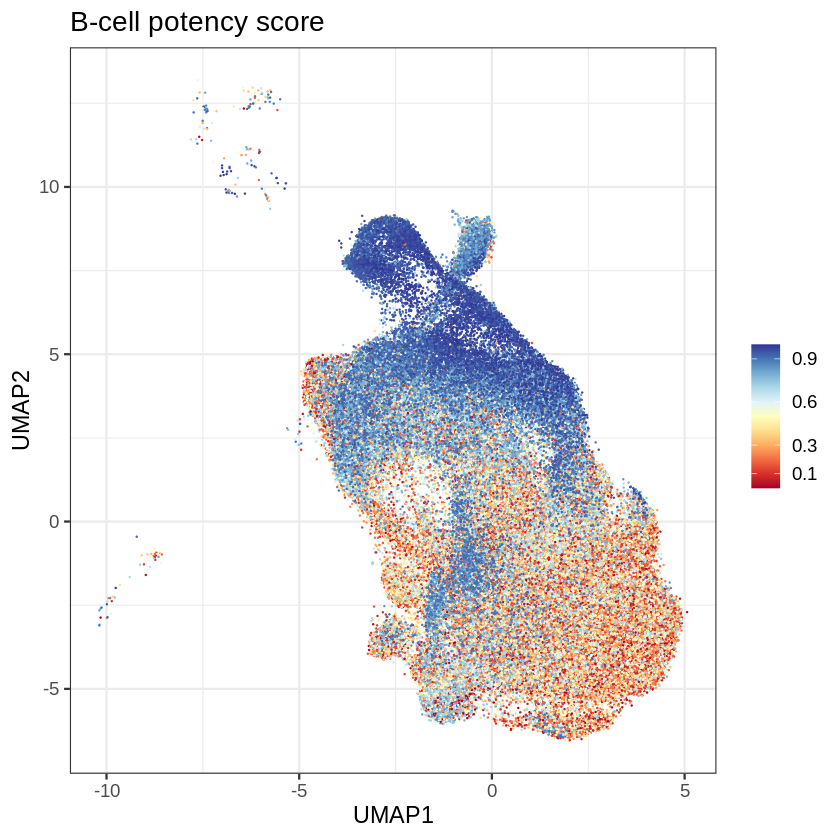

In [15]:
mycol = rev(brewer.pal(11,"RdYlBu"))
mycol = brewer.pal(11,"RdYlBu")
B_cell@meta.data %>%
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>%
#     arrange(-CytoTRACE2_Relative)  %>%
    ggplot(aes(x = UMAP_1, y= UMAP_2)) +
    geom_point(aes(color = CytoTRACE2_Relative), size = 0.05) +
    scale_color_gradientn(colours = mycol, breaks = c(0.1, 0.3, 0.6, 0.9)) +
    theme_bw(base_size = 14) +
    labs(x = "UMAP1", y = "UMAP2", title = "B-cell potency score") +
    theme(legend.title=element_blank())

ggsave("./results/figures/6_cytotrace2_relative_potency.pdf", width = 9, height =6)

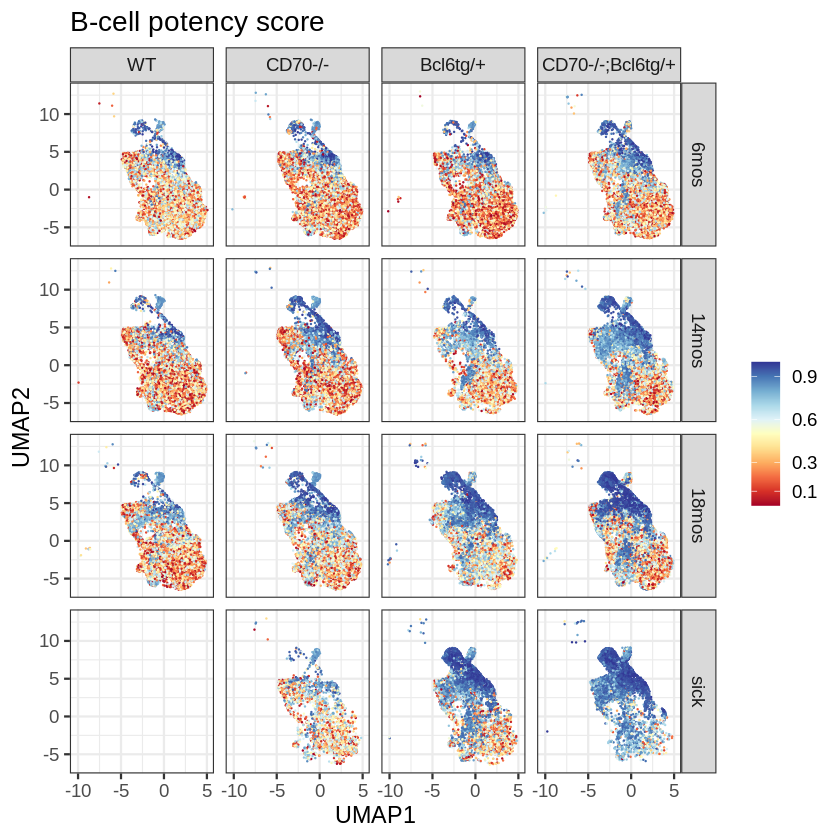

In [16]:
mycol = rev(brewer.pal(11,"RdYlBu"))
mycol = brewer.pal(11,"RdYlBu")
B_cell@meta.data %>%
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>%
#     arrange(CytoTRACE2_Relative)  %>%
    ggplot(aes(x = UMAP_1, y= UMAP_2)) +
    geom_point(aes(color = CytoTRACE2_Relative), size = 0.05) +
    scale_color_gradientn(colours = mycol, breaks = c(0.1, 0.3, 0.6, 0.9)) +
    theme_bw(base_size = 14) +
    labs(x = "UMAP1", y = "UMAP2", title = "B-cell potency score") +
    theme(legend.title=element_blank()) +
    facet_grid(age ~ genotype)

ggsave("./results/figures/6_cytotrace2_relative_potency_by_age_by_genotype.pdf", width = 9, height =6)